### Chi-square test

The chi-square distribution is a probability distribution that arises in the context of hypothesis testing and statistical inference. It is a special case of the gamma distribution and is widely used in various statistical tests.

$[ f(x; k) = \frac{1}{2^{k/2} \Gamma(k/2)} x^{k/2 - 1} e^{-x/2} ]$


In the chi-squared distribution, the degrees of freedom ($k$) are related to the number of categories minus 1. The distribution of the test statistic $(X^2)$ follows a chi-squared distribution with $(k)$ degrees of freedom.

The chi-squared test is commonly applied in:
- Significance testing for variance.
- Goodness-of-fit tests for categorical variables.
- Testing independence between two categorical variables using contingency tables.

### Chi-square test

The chi-square test is a statistical test used to determine whether there is a significant association between two categorical variables. It is a non-parametric test that compares the observed frequencies in a contingency table with the frequencies that would be expected if the variables were independent.

The chi-squared test statistic, denoted as $(X^2)$, is calculated using the following formula:

$[ X^2 = \sum \frac{(O_i - E_i)^2}{E_i} ]$

Where:
- Observed Frequencies $(O_i)$.
  - These are the actual counts or occurrences observed in the data. In the chi-squared test, you compare these observed counts to what you would expect based on a theoretical distribution.

- Expected Frequencies $(E_i)$.
  - For a continuous distribution, the expected frequencies are often calculated based on a theoretical distribution. In this example, since we're dealing with the sum of squares of standard normal 
  variables, we expect the resulting distribution to follow a chi-squared distribution.
- Calculation of the Statistic:
  - For each category or bin, you take the square of the difference between the observed and expected counts.
  - You then divide this squared difference by the expected count for that category.
  - This process is done for each category, and the results are summed up.
  
This formula is often used in the context of contingency tables where we compare observed frequencies ($O_i$) with expected frequencies ($E_i$) under a specific hypothesis. The test assesses whether there is a significant difference between the observed and expected frequencies, considering the variability.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, chi2_contingency

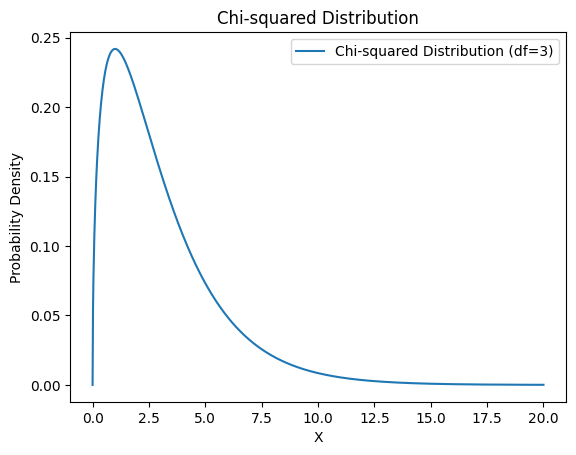

Chi-squared Statistic: 15.041666666666666
P-value: 0.00010516355403363098
Reject the null hypothesis: There is a significant relationship.


In [13]:
# Example 1: Plotting Chi-squared Distribution
df = 3  # Degrees of freedom
x = np.linspace(0, 20, 1000)
y = chi2.pdf(x, df)

plt.plot(x, y, label=f"Chi-squared Distribution (df={df})")
plt.title("Chi-squared Distribution")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

# Example 2: Chi-squared Test (Contingency Table)
# Create a 2x2 contingency table
observed = np.array([[30, 10], [20, 40]])

# Perform Chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(observed)

print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis: No significant relationship.")

In [17]:
# Example dataset
data = {"Variable_1": [1.5, -0.8], "Variable_2": [0.7, -1.2]}
df = pd.DataFrame(data)

# Calculate chi-squared variable X for each row
df["X"] = df["Variable_1"] ** 2 + df["Variable_2"] ** 2

# Display the dataset with the chi-squared variable
df

,Variable_1,Variable_2,X
0,1.5,0.7,2.74
1,-0.8,-1.2,2.08


In [15]:
# Generate a larger dataset with random values
np.random.seed(42)
data = {'Variable_1': np.random.normal(0, 1, 1000), 'Variable_2': np.random.normal(0, 1, 1000)}
df = pd.DataFrame(data)

# Calculate chi-squared variable X for each row
df['X'] = df['Variable_1']**2 + df['Variable_2']**2

# Display the dataset with the chi-squared variable
df.head()

,Variable_1,Variable_2,X
0,0.496714,1.399355,2.204921
1,-0.138264,0.924634,0.874064
2,0.647689,0.059630,0.423056
3,1.523030,-0.646937,2.738147
4,-0.234153,0.698223,0.542344


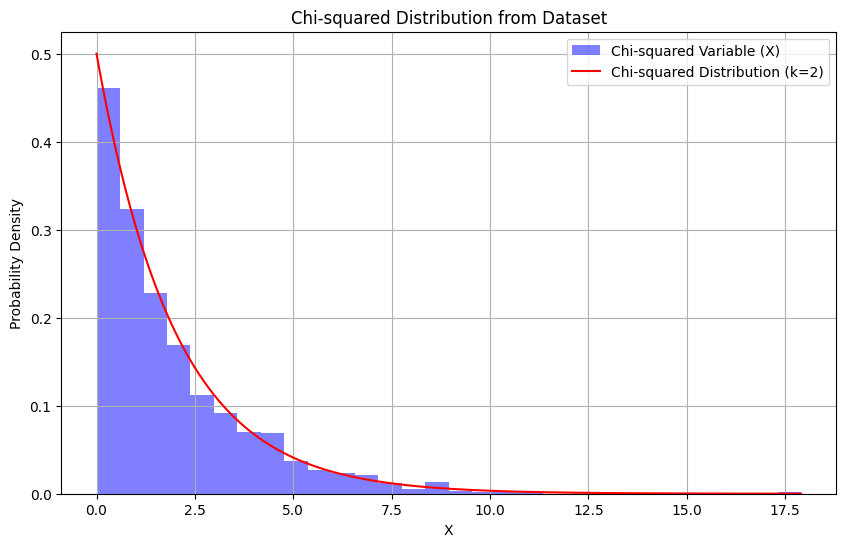

In [19]:
# Generate a larger dataset with random values
np.random.seed(42)
data = {
    "Variable_1": np.random.normal(0, 1, 1000),
    "Variable_2": np.random.normal(0, 1, 1000),
}
df = pd.DataFrame(data)

# Calculate chi-squared variable X for each row
df["X"] = df["Variable_1"] ** 2 + df["Variable_2"] ** 2

# Degrees of freedom for chi-squared distribution
degrees_of_freedom = 2  # You can adjust this based on your scenario

# Generate values for the chi-squared variable
x = np.linspace(0, df["X"].max(), 1000)
pdf_values = chi2.pdf(x, df=degrees_of_freedom)

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.hist(
    df["X"],
    bins=30,
    density=True,
    alpha=0.5,
    color="blue",
    label="Chi-squared Variable (X)",
)
plt.plot(
    x, pdf_values, "r-", label=f"Chi-squared Distribution (k={degrees_of_freedom})"
)
plt.title("Chi-squared Distribution from Dataset")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df["Variable_1"].value_counts(normalize=True)

In [32]:
 np.histogram(df['Variable_1'], bins=10)

(array([  4,  22,  96, 228, 272, 226, 104,  38,   9,   1]),
 array([-3.24126734, -2.53186746, -1.82246757, -1.11306769, -0.40366781,
         0.30573208,  1.01513196,  1.72453184,  2.43393172,  3.14333161,
         3.85273149]))

In [16]:
import pandas as pd
import numpy as np

# Generate a larger dataset with random values
np.random.seed(42)
data = {
    "Variable_1": np.random.normal(0, 1, 1000),
    "Variable_2": np.random.normal(0, 1, 1000),
}
df = pd.DataFrame(data)

# Calculate chi-squared variable X for each row
df["X"] = df["Variable_1"] ** 2 + df["Variable_2"] ** 2

# Display the dataset with the chi-squared variable
print(df.head())

# Calculate the observed frequencies (assuming binning)
observed_frequencies, _ = np.histogram(df["X"], bins=10)  # Adjust the number of bins as needed

# Expected frequencies based on chi-squared distribution
expected_frequencies = np.histogram(np.random.chisquare(2, 1000), bins=10)[0]  # Chi-squared with 2 degrees of freedom

# Apply the chi-squared formula
chi_squared_value = np.sum( (observed_frequencies - expected_frequencies) ** 2 / expected_frequencies )

# Display the results
print(f"Observed Frequencies: {observed_frequencies}")
print(f"Expected Frequencies: {expected_frequencies}")
print(f"Chi-Squared Value: {chi_squared_value}")

   Variable_1  Variable_2         X
0    0.496714    1.399355  2.204921
1   -0.138264    0.924634  0.874064
2    0.647689    0.059630  0.423056
3    1.523030   -0.646937  2.738147
4   -0.234153    0.698223  0.542344
Observed Frequencies: [604 223 105  43  18   5   1   0   0   1]
Expected Frequencies: [492 256 129  54  36  22   3   3   4   1]
Chi-Squared Value: 66.92539519885707


In [33]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a DataFrame with categorical data
data = {"Category": ["A", "B", "A", "A", "B", "C", "C", "A", "B", "C"]}
df = pd.DataFrame(data)

# Create a frequency table
observed_counts = df["Category"].value_counts()

# Define expected frequencies (you might have these based on some hypothesis)
expected_counts = {"A": 4, "B": 3, "C": 3}

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(observed_counts.values.reshape(1, -1))

# Compare p-value with significance level (e.g., 0.05)
if p < 0.05:
    print("Reject the null hypothesis. The distribution is not as expected.")
else:
    print(
        "Fail to reject the null hypothesis. The distribution is consistent with expectations."
    )

Fail to reject the null hypothesis. The distribution is consistent with expectations.


In [34]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Create a DataFrame with continuous data
np.random.seed(42)
data = {"Variable": np.random.normal(0, 1, 100)}
df = pd.DataFrame(data)

# Bin the continuous variable into categories
bins = [-np.inf, -0.5, 0.5, np.inf]  # Define bins
df["Category"] = pd.cut(
    df["Variable"], bins=bins, labels=["< -0.5", "-0.5 to 0.5", "> 0.5"]
)

# Create a frequency table
observed_counts = df["Category"].value_counts()

# Define expected frequencies (you might have these based on some hypothesis)
expected_counts = {"< -0.5": 25, "-0.5 to 0.5": 50, "> 0.5": 25}

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(observed_counts.values.reshape(1, -1))

# Compare p-value with significance level (e.g., 0.05)
if p < 0.05:
    print("Reject the null hypothesis. The distribution is not as expected.")
else:
    print(
        "Fail to reject the null hypothesis. The distribution is consistent with expectations."
    )

Fail to reject the null hypothesis. The distribution is consistent with expectations.


In [35]:
 [-np.inf, -0.5, 0.5, np.inf]

[-inf, -0.5, 0.5, inf]